In [1]:
import seaborn
import numpy as np
import matplotlib.pyplot as plt

# Базовая задача МНК

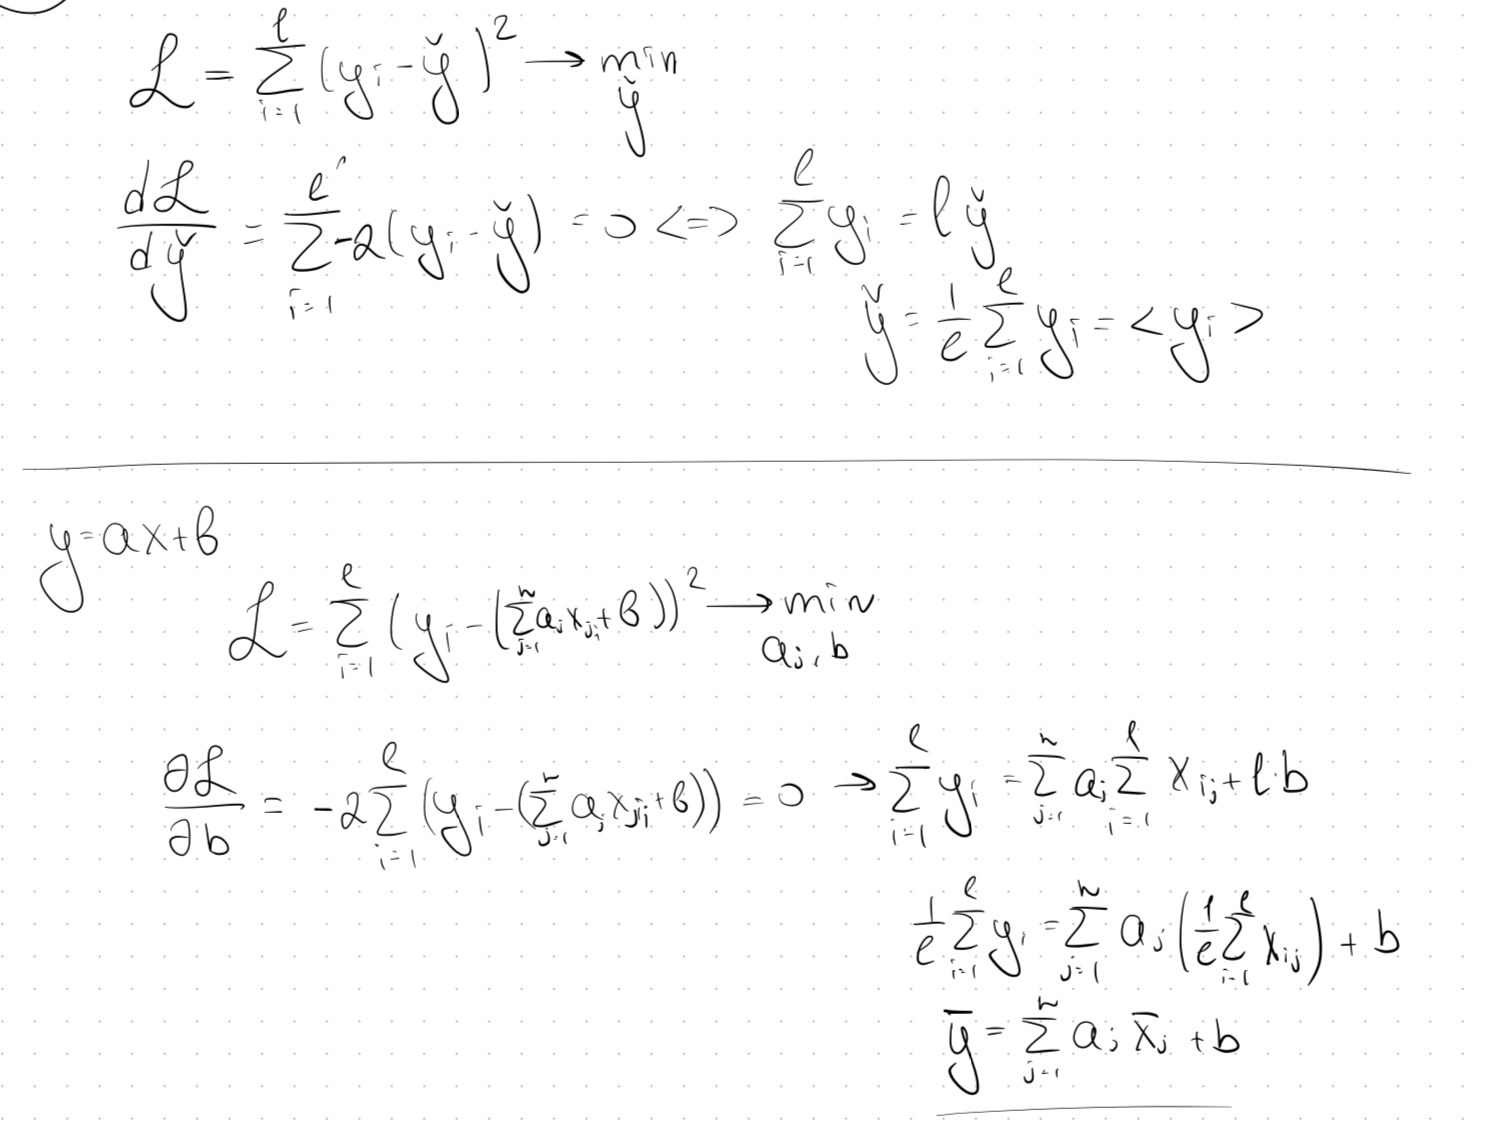

Выборочная дисперсия для х:  10.0
Выборочная дисперсия для y:  3.7501745351239677
Коэффициент корреляции:  0.81636624276147


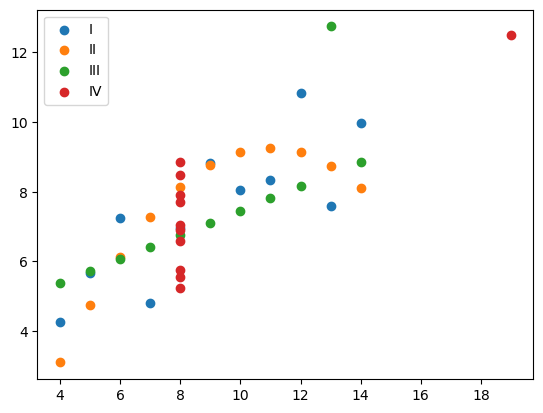

In [2]:
data = seaborn.load_dataset('anscombe')
x = data.x
print('Выборочная дисперсия для х: ', np.var(x))
y = data.y
print('Выборочная дисперсия для y: ', np.var(y))
print('Коэффициент корреляции: ', np.corrcoef(x, y)[0,1])
data1 = data.loc[data['dataset'] == "I"]
data2 = data.loc[data['dataset'] == "II"]
data3 = data.loc[data['dataset'] == "III"]
data4 = data.loc[data['dataset'] == "IV"]
plt.scatter(data1.x,data1.y,label='I')
plt.scatter(data2.x,data2.y,label='II')
plt.scatter(data3.x,data3.y,label='III')
plt.scatter(data4.x,data4.y,label='IV')

plt.legend()
plt.show()

# Централизация признаков и МНК.

1. Когда мы центрируем признаки в X, среднее значение каждого признака становится нулевым. Аналогично, как мы работаем с отклонениями от среднего, что исключает необходимость учитывать свободный член в модели. (X^T X)^-1 для центрированных данных будет соответствовать только влиянию признаков без необходимости учитывать свободный член.

2. Добавление столбца единиц в матрицу X эквивалентно добавлению свободного члена в модель, что позволяет модели учитывать свободный член. При вычислении (X^T X)^-1 для расширенной матрицы, последний столбец и строка представляют влияние свободного члена. Удаление этой строки и столбца возвращает к случаю, когда мы не учитываем свободный член —  ситуация становится аналогичной центрированным признакам.

In [5]:
np.random.seed(42)
X = np.random.randn(10, 5)

X1 = X - X.mean(axis=0) 
X1_final = np.linalg.inv(X1.T @ X1) 

X2 = np.hstack([X, np.ones((X.shape[0], 1))]) 
X2_1 = np.linalg.inv(X2.T @ X2) 
X2_final = X2_1[:-1, :-1]

are_equal = np.allclose(X1_final, X2_final)

are_equal

True

# Геометрический смысл псевдообратной матрицы

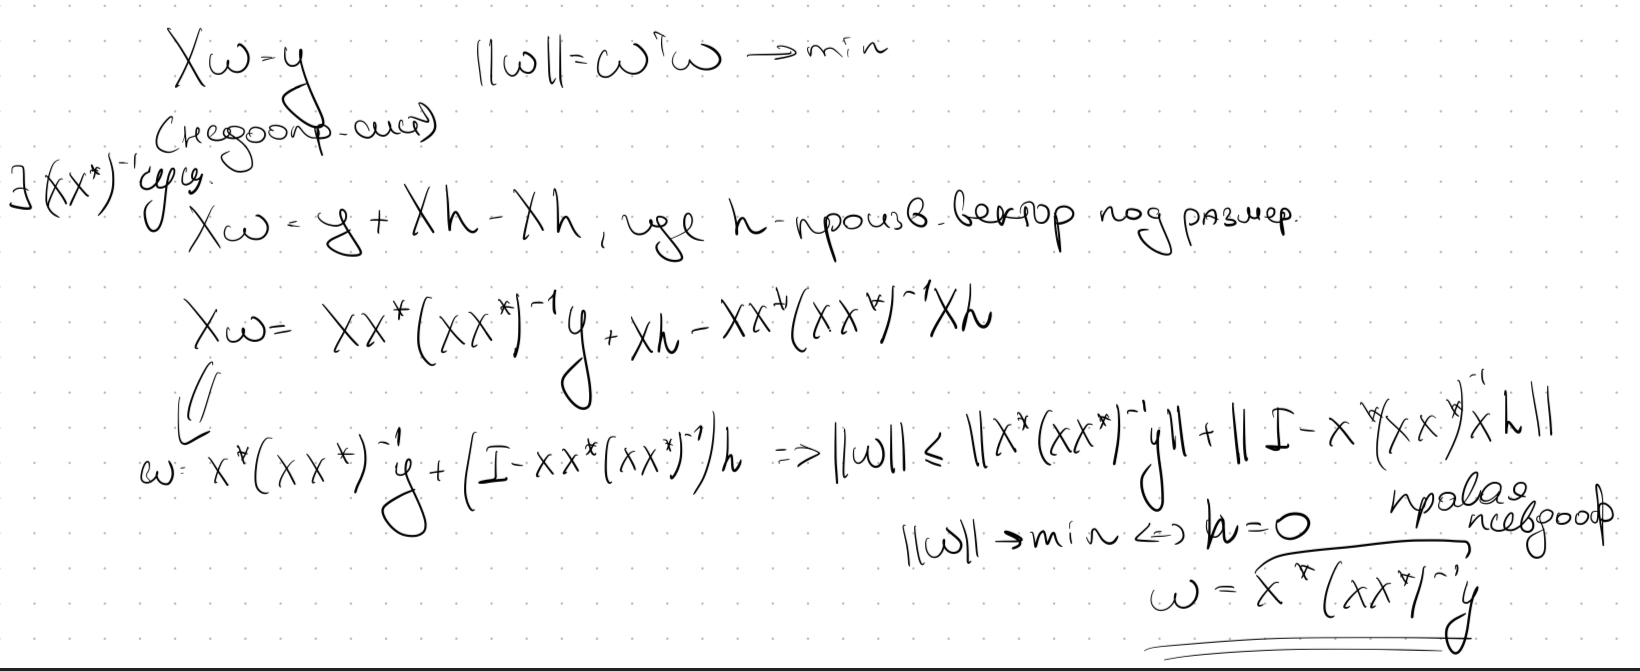

# Матрица объект-признак

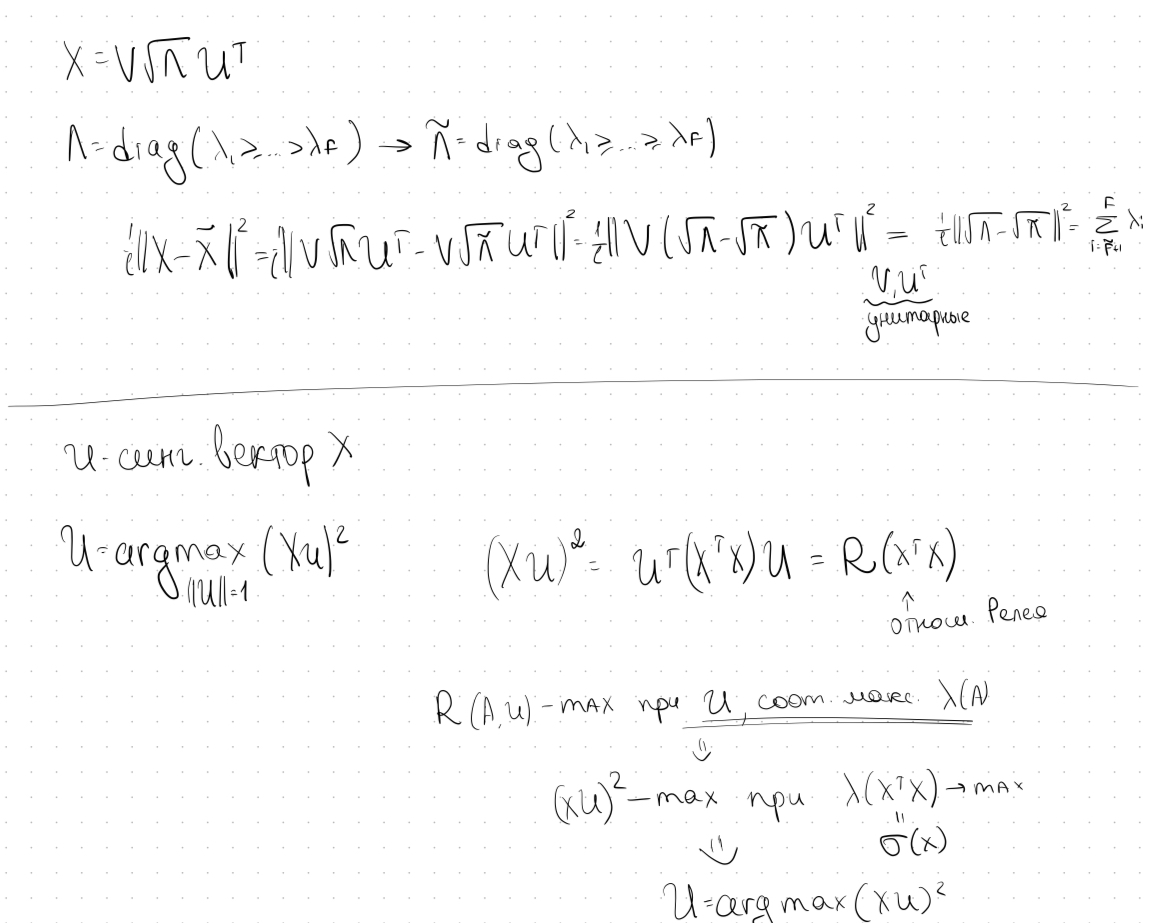

/var/folders/pp/mwb40zv519zbg002_qh26rb40000gn/T/ipykernel_16007/2102077634.py:8: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  P = np.random.multivariate_normal([0, 0, 0], A, size=N)


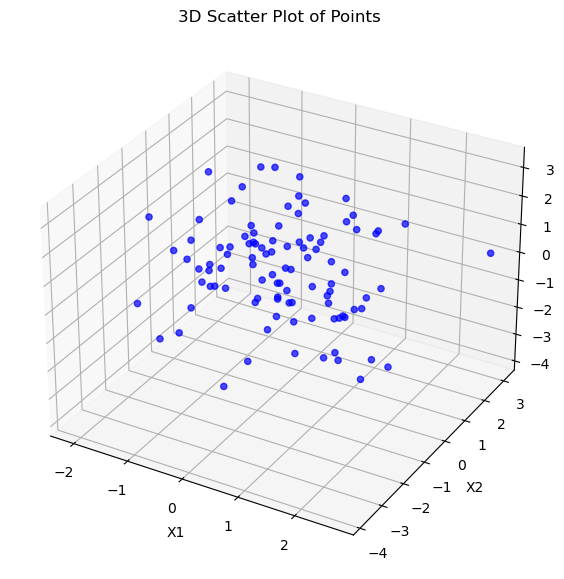

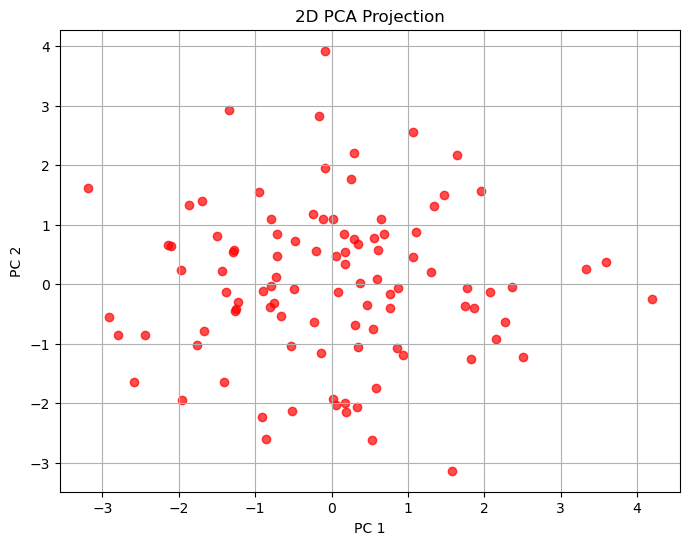

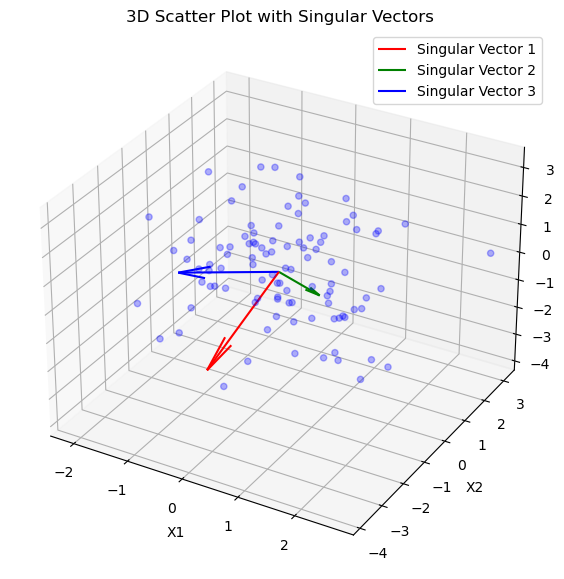

In [16]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

N = 100 
A = np.random.randn(3, 3)
A = (A + A.T) / 2  

P = np.random.multivariate_normal([0, 0, 0], A, size=N)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(P[:, 0], P[:, 1], P[:, 2], c='b', marker='o', alpha=0.7)
ax.set_title('3D Scatter Plot of Points')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.show()

pca = PCA(n_components=2)
X_pca = pca.fit_transform(P)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='r', marker='o', alpha=0.7)
plt.title('2D PCA Projection')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.grid(True)
plt.show()


U, S, Vt = np.linalg.svd(P)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.quiver(0, 0, 0, 10*U[0, 0], 10*U[0, 1], 10*U[0, 2], color='r', label='Singular Vector 1')
ax.quiver(0, 0, 0, 10*U[1, 0], 10*U[1, 1], 10*U[1, 2], color='g', label='Singular Vector 2')
ax.quiver(0, 0, 0, 10*U[2, 0], 10*U[2, 1], 10*U[2, 2], color='b', label='Singular Vector 3')
ax.scatter(P[:, 0], P[:, 1], P[:, 2], c='b', marker='o', alpha=0.3)
ax.set_title('3D Scatter Plot with Singular Vectors')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
ax.legend()
plt.show()

# Геометрический смысл сингулярного разложения

Задача минимизации суммы квадратов расстояний от точек до прямой a является стандартной задачей PCA. В данном случае, главная компонента будет представлять собой направление, которое объясняет наибольшую дисперсию данных. Это направление совпадает с сингулярным вектором, отвечающим наибольшему сингулярному числу матрицы объект-признак X

При сингулярном разложении мы переходим к независимым признакам, и чем больше сингулярное число, тем важнее соответствующий признак. Если взять вектор, который соответствует наибольшему сингулярному числу, то он будет отвечать самому важному признаку, а это и означает, что он будет наиболее точно отражать зависимость между  𝑥𝑖  и  𝑦𝑖 .

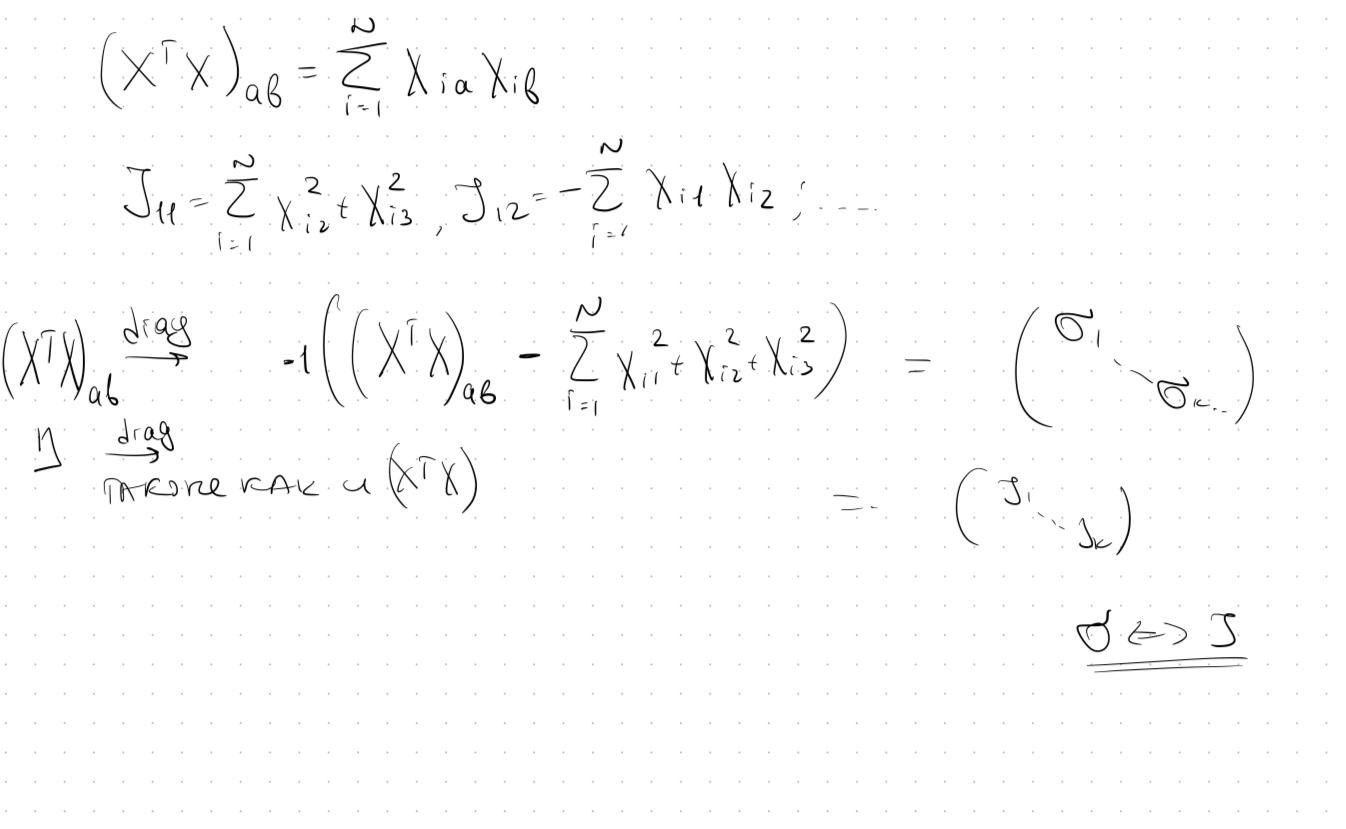

In [17]:
n = 8
H8 = np.zeros((n,n))
for i in range (1,n+1):
  for j in range (1,n+1):
    H8[i-1,j-1]=1/(i+j-1)
b8 = np.array([1,0,0,0,0,0,0,0])
print('Стандарт, H8: \n', np.linalg.solve(H8, b8))
u, s, v = np.linalg.svd(H8)
s[(s < 10**(-8))] = 0
sing = np.eye(n)
sing[(sing > 0)] = s
H8_1 = (u @ sing) @ v
print('Сингулярные, H8: \n', np.linalg.solve(H8_1, b8))

n = 10
H10 = np.zeros((n,n))
for i in range (1,n+1):
  for j in range (1,n+1):
    H10[i-1,j-1]=1/(i+j-1)
b10 = np.array([1,0,0,0,0,0,0,0,0,0])
print('Стандарт, H10: \n', np.linalg.solve(H10, b10))
u, s, v = np.linalg.svd(H10)
s[(s < 10**(-8))] = 0
sing = np.eye(n)
sing[(sing > 0)] = s
H10_1 = (u @ sing) @ v
print('Сингулярные, H10: \n', np.linalg.solve(H10_1, b10))


Стандарт, H8: 
 [ 6.39999994e+01 -2.01599997e+03  2.01599996e+04 -9.23999976e+04
  2.21759993e+05 -2.88287991e+05  1.92191993e+05 -5.14799981e+04]
Сингулярные, H8: 
 [-8.42774293e+08  4.52999607e+10 -5.92889819e+11  3.21475113e+12
 -8.66903295e+12  1.22834794e+13 -8.75209130e+12  2.47194993e+12]
Стандарт, H10: 
 [ 9.99987631e+01 -4.94989124e+03  7.91976487e+04 -6.00578353e+05
  2.52241564e+06 -6.30601048e+06  9.60912123e+06 -8.75113413e+06
  4.37555394e+06 -9.23725599e+05]
Сингулярные, H10: 
 [-1.11498244e+09  5.18882385e+10 -5.73920087e+11  2.45356356e+12
 -4.24602399e+12  7.15731715e+11  7.02796218e+12 -8.70641977e+12
  3.54631608e+12 -2.67243968e+11]
